In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Load the dataset
# Load the dataset
data_url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv'
data = pd.read_csv(data_url)
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

The data has 8425 rows × 23 columns

In [2]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [4]:
data.shape

(8425, 23)

data has 18249 rows and 14 columns out of which 1 is target and remaining are independent variable

In [5]:
data.columns
data.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Data type is object,int64 and float

In [14]:
#checking the null values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There area null values in the data frame

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

<AxesSubplot:>

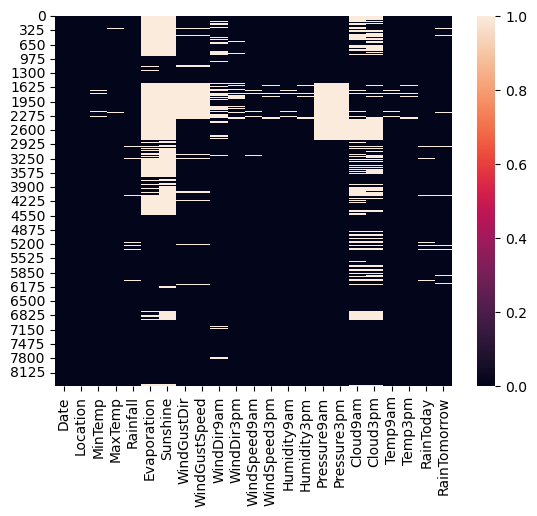

In [16]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is single colour so there is no null values as seen above also

In [17]:
# to check unique vqlues
data['Rainfall'].unique()


array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

In [18]:
data['Location'].nunique()# number of unique values


12

In [19]:
data['Temp9am'].nunique()# number of unique values


304

In [20]:
data['Evaporation'].nunique()# number of unique values

116

In [21]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [22]:
data["Rainfall"].unique()
data.shape[0]


8425

In [23]:
data.loc[data["Rainfall"]==" "]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]

<AxesSubplot:>

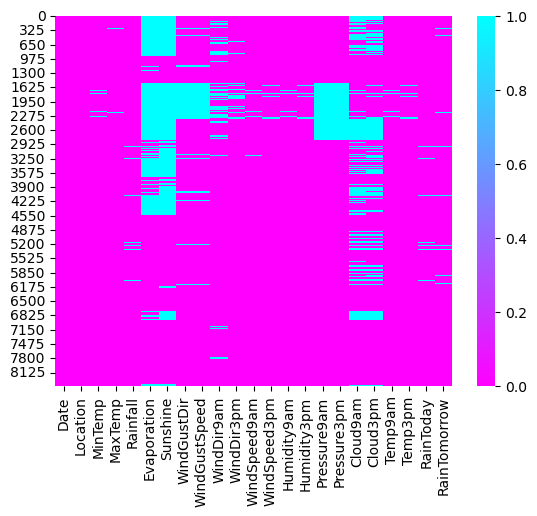

In [24]:
sns.heatmap(data.isnull(),cmap="cool_r")

In [27]:
# Replace null values with mean
data1 = data.fillna(data.mean())

# Display the DataFrame with filled values
print(data1)

            Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
0     2008-12-01   Albury     13.4  22.900000       0.6     5.389395   
1     2008-12-02   Albury      7.4  25.100000       0.0     5.389395   
2     2008-12-03   Albury     12.9  25.700000       0.0     5.389395   
3     2008-12-04   Albury      9.2  28.000000       0.0     5.389395   
4     2008-12-05   Albury     17.5  32.300000       1.0     5.389395   
...          ...      ...      ...        ...       ...          ...   
8420  2017-06-21    Uluru      2.8  23.400000       0.0     5.389395   
8421  2017-06-22    Uluru      3.6  25.300000       0.0     5.389395   
8422  2017-06-23    Uluru      5.4  26.900000       0.0     5.389395   
8423  2017-06-24    Uluru      7.8  27.000000       0.0     5.389395   
8424  2017-06-25    Uluru     14.9  23.859976       0.0     5.389395   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0     7.632205           W      44.000000          W  ...     

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12868\2526040416.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = data.fillna(data.mean())


In [28]:
data1.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

In [29]:
#checking the unique values in each column
data1.nunique().to_frame("No.of unique value")

No.of unique value
Date                         3004
Location                       12
MinTemp                       286
MaxTemp                       332
Rainfall                      251
Evaporation                   117
Sunshine                      141
WindGustDir                    16
WindGustSpeed                  53
WindDir9am                     16
WindDir3pm                     16
WindSpeed9am                   35
WindSpeed3pm                   36
Humidity9am                    91
Humidity3pm                    95
Pressure9am                   385
Pressure3pm                   375
Cloud9am                       10
Cloud3pm                       10
Temp9am                       305
Temp3pm                       329
RainToday                       2
RainTomorrow                    2

In [30]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [31]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


 data visualization

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64


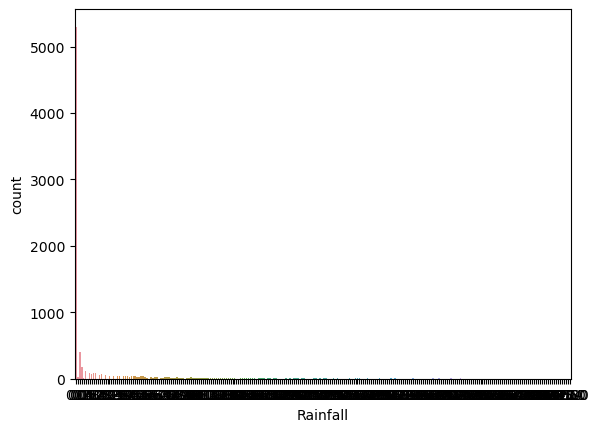

In [32]:

import seaborn as sns

if data["Rainfall"].notnull().any():
    sns.countplot(x='Rainfall', data=data)
    print(data["Rainfall"].value_counts())
else:
    print("The 'Rainfall' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

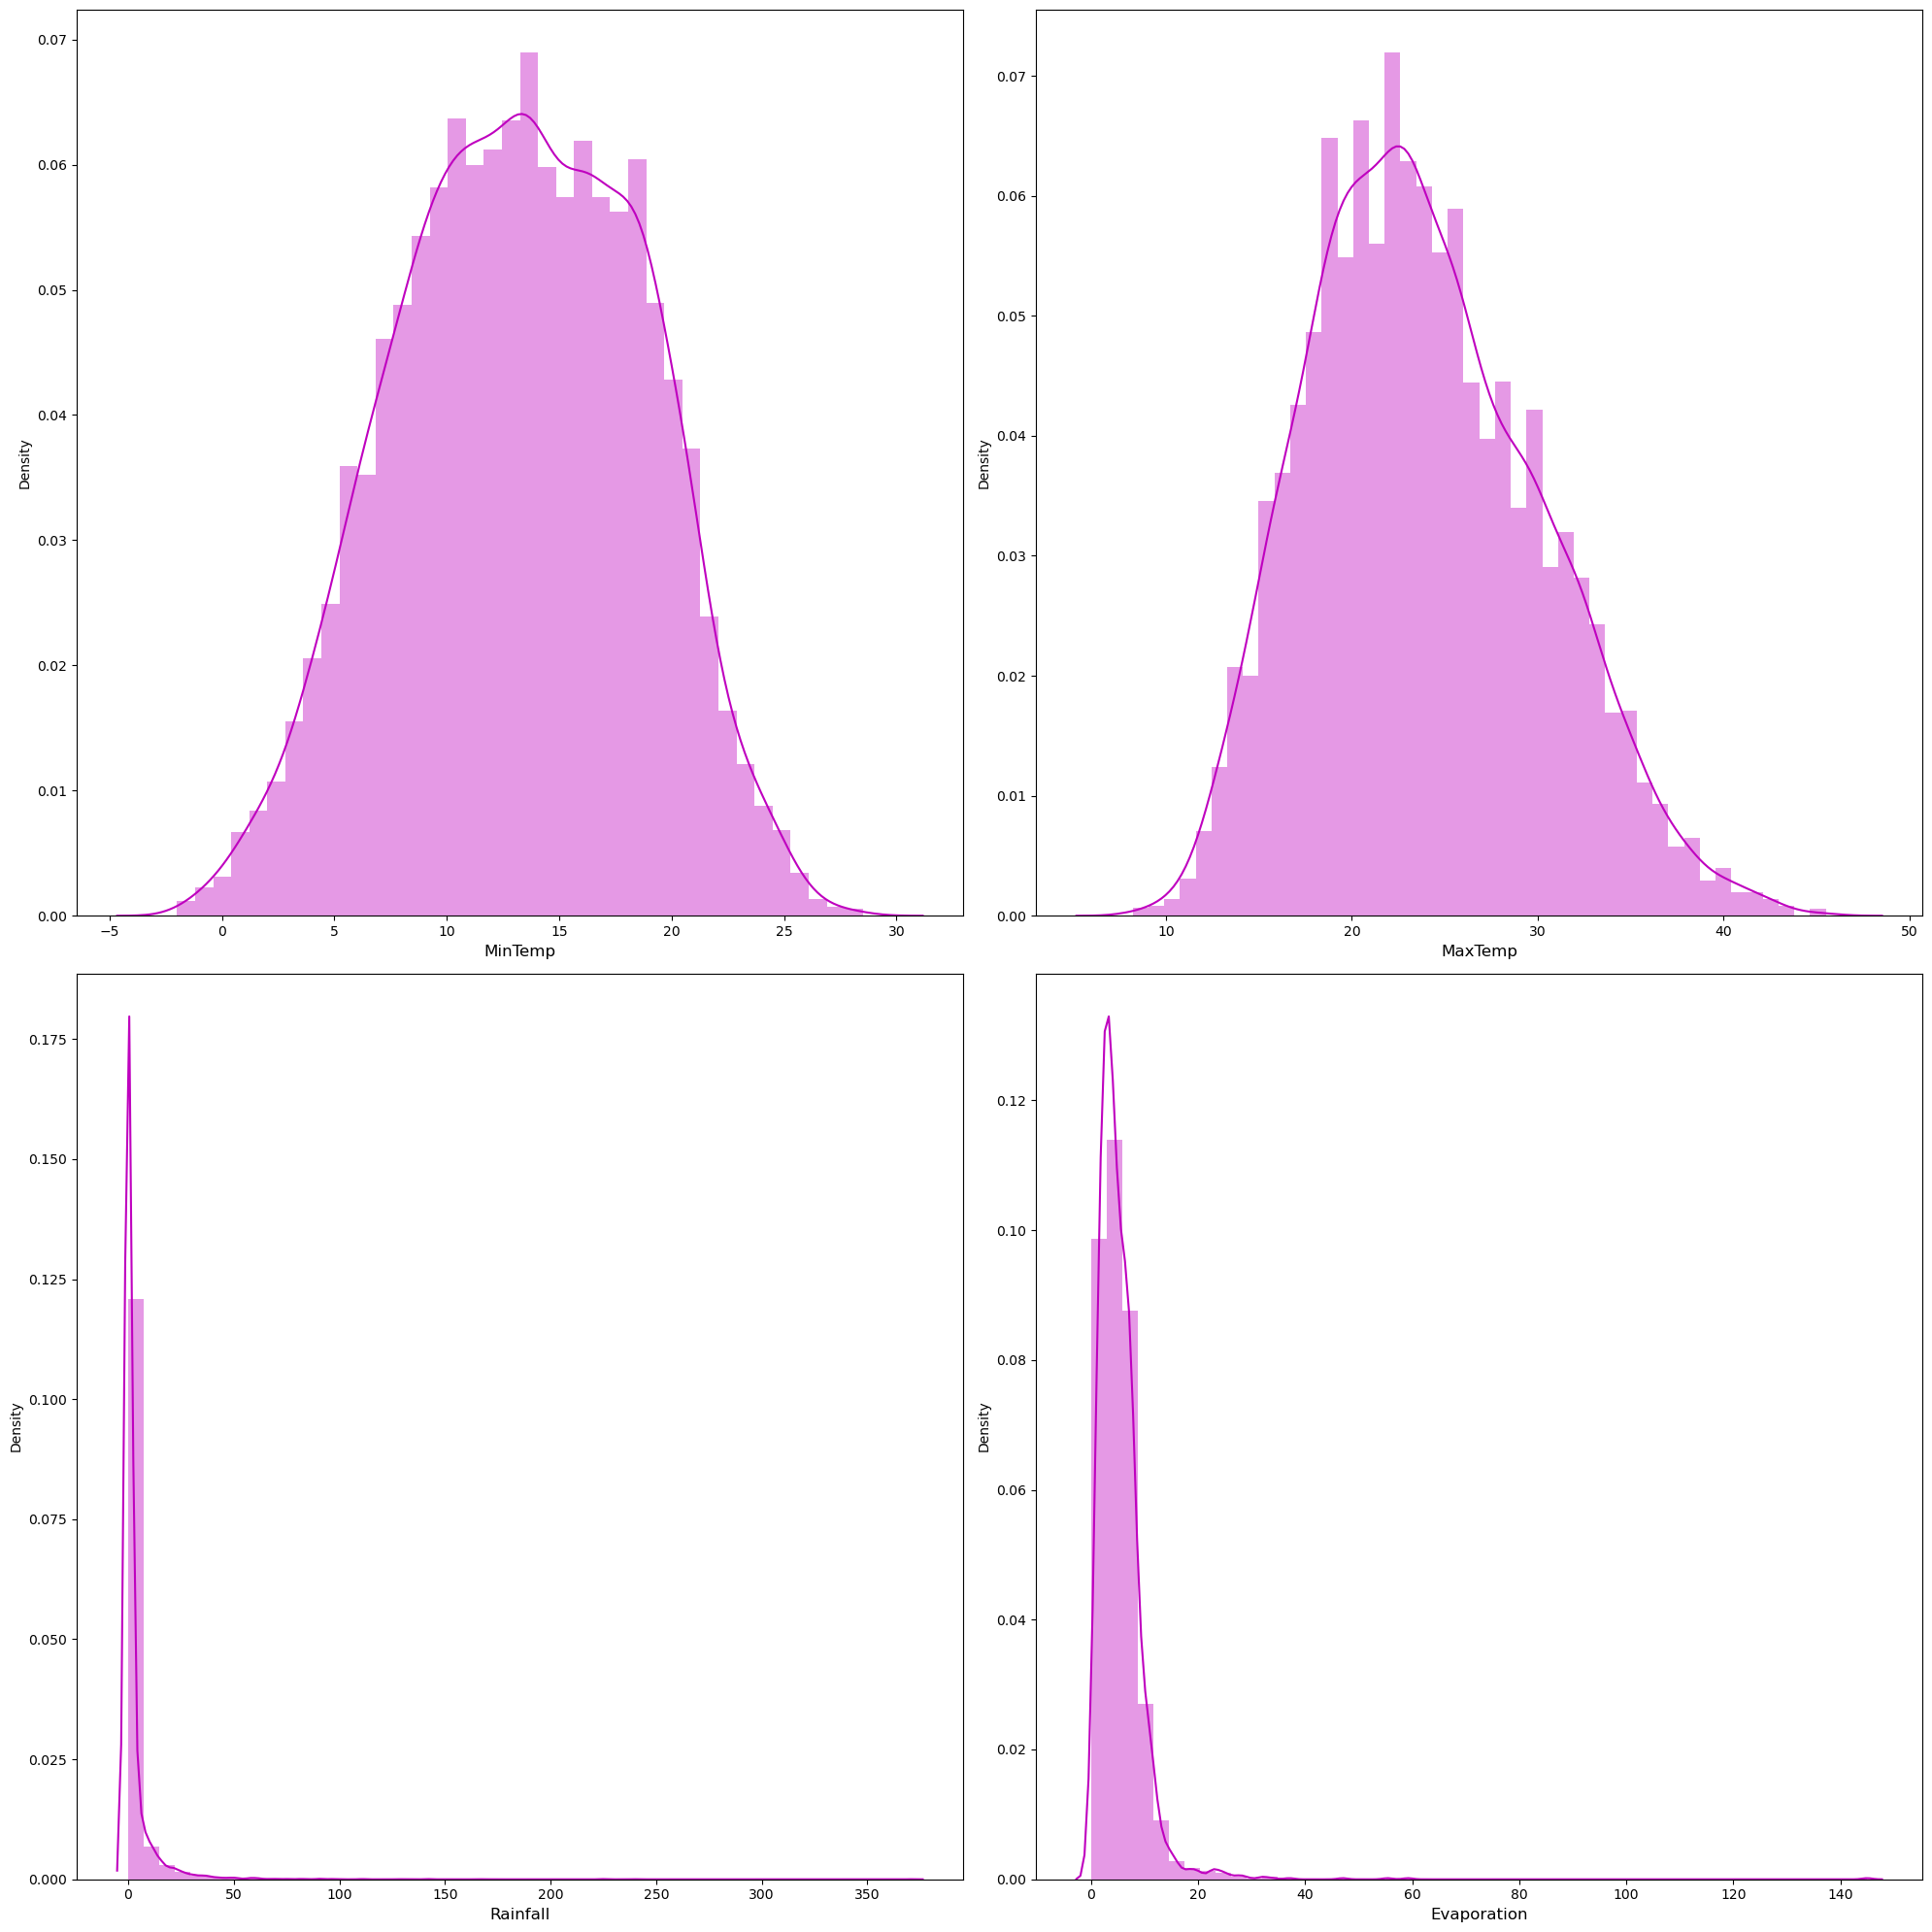

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


skewed data

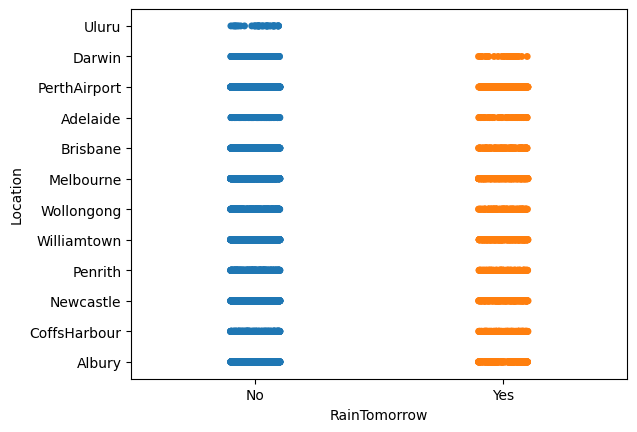

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='RainTomorrow', y='Location',data=data)
plt.show()

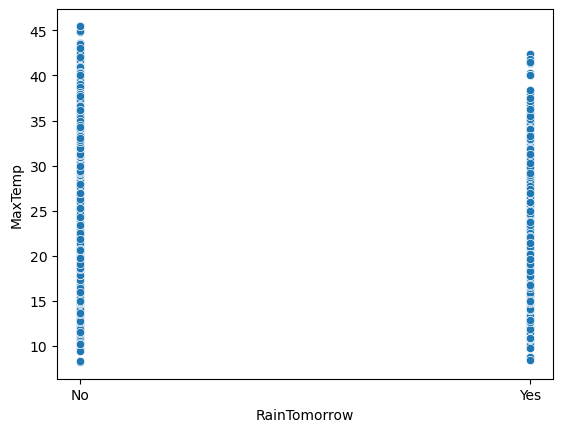

In [35]:
import matplotlib.pyplot as plt
sns.scatterplot(x='RainTomorrow', y="MaxTemp",data=data)
plt.show()

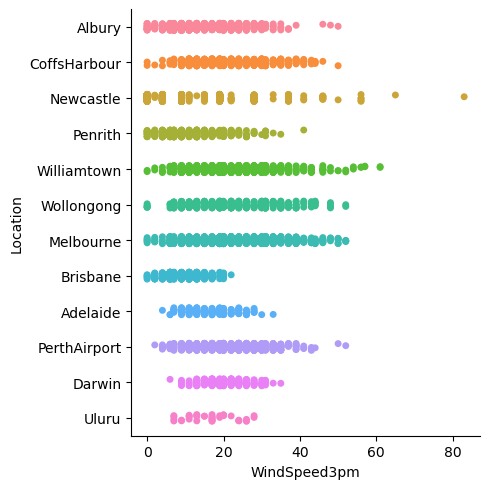

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='WindSpeed3pm', y='Location', data=data)
plt.show()

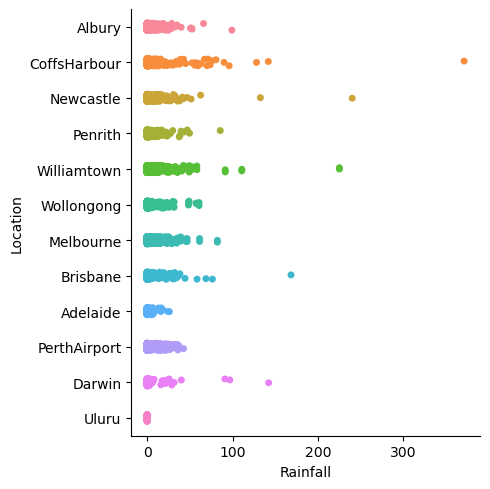

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Rainfall', y="Location",data=data)
plt.show()


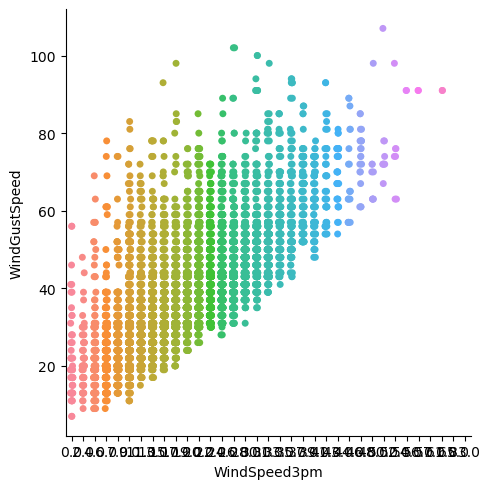

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='WindSpeed3pm', y='WindGustSpeed', data=data)
plt.show()

Multivariate Analysis

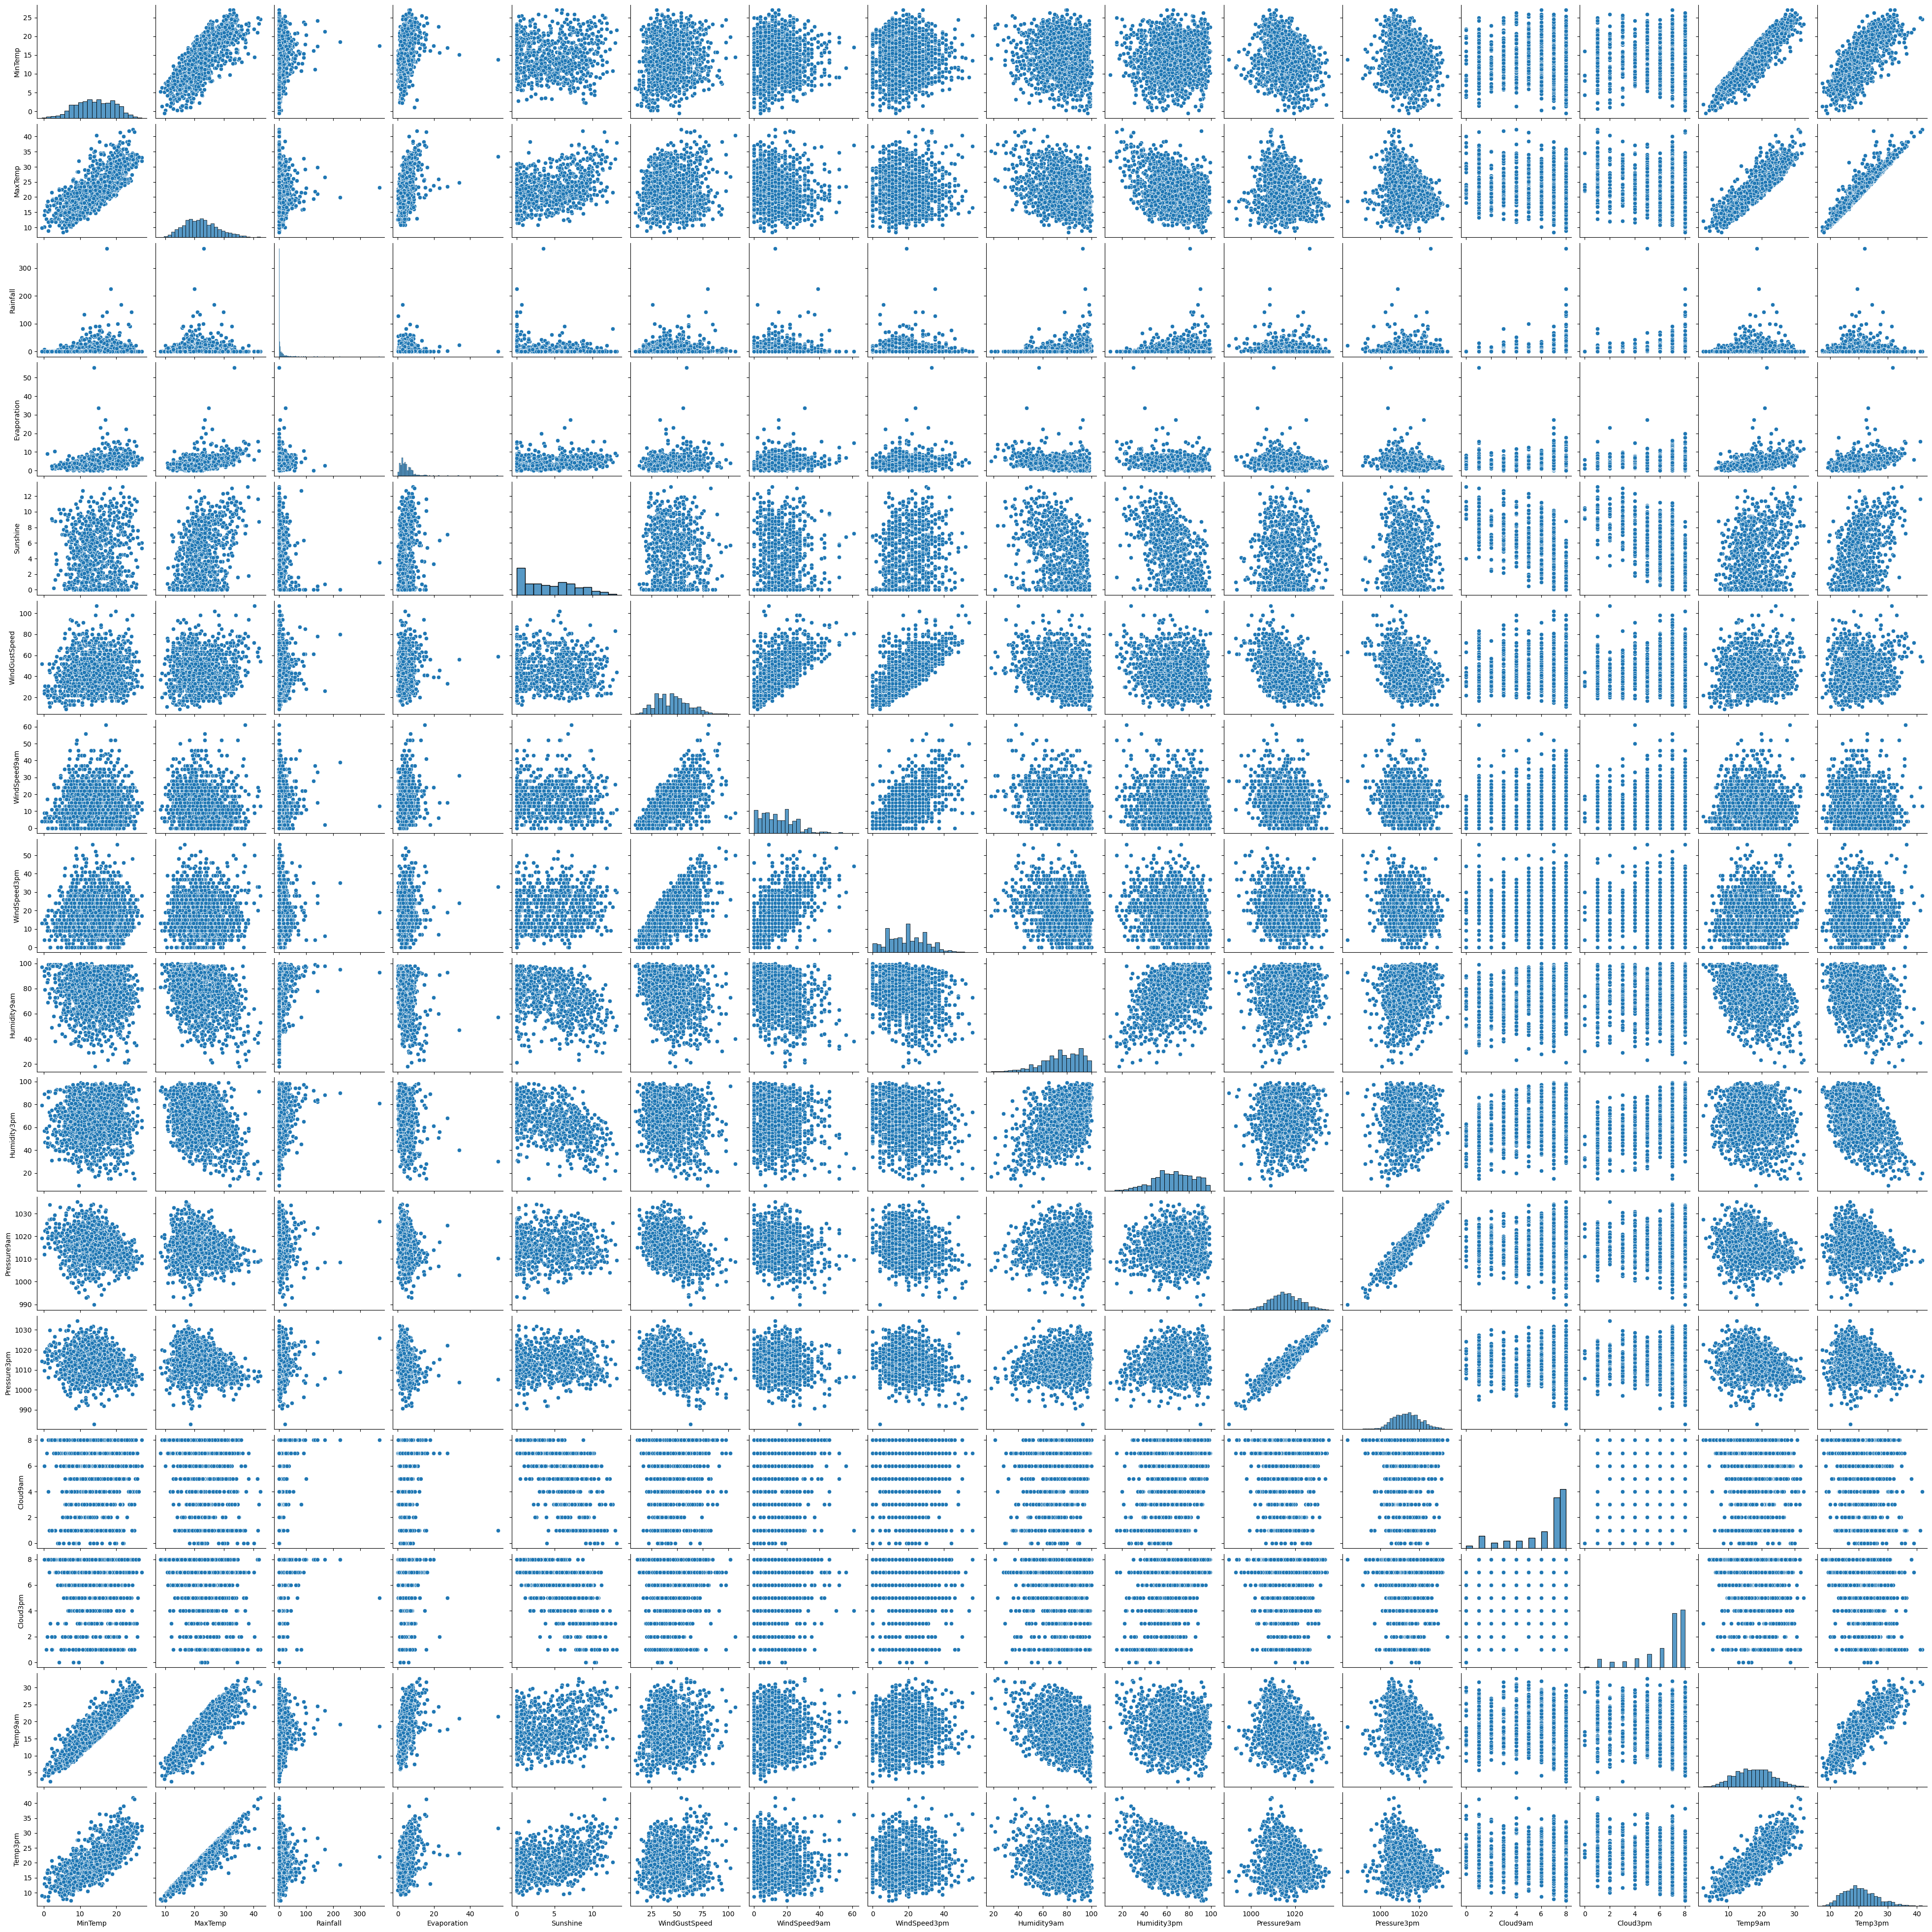

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['RainTomorrow']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()


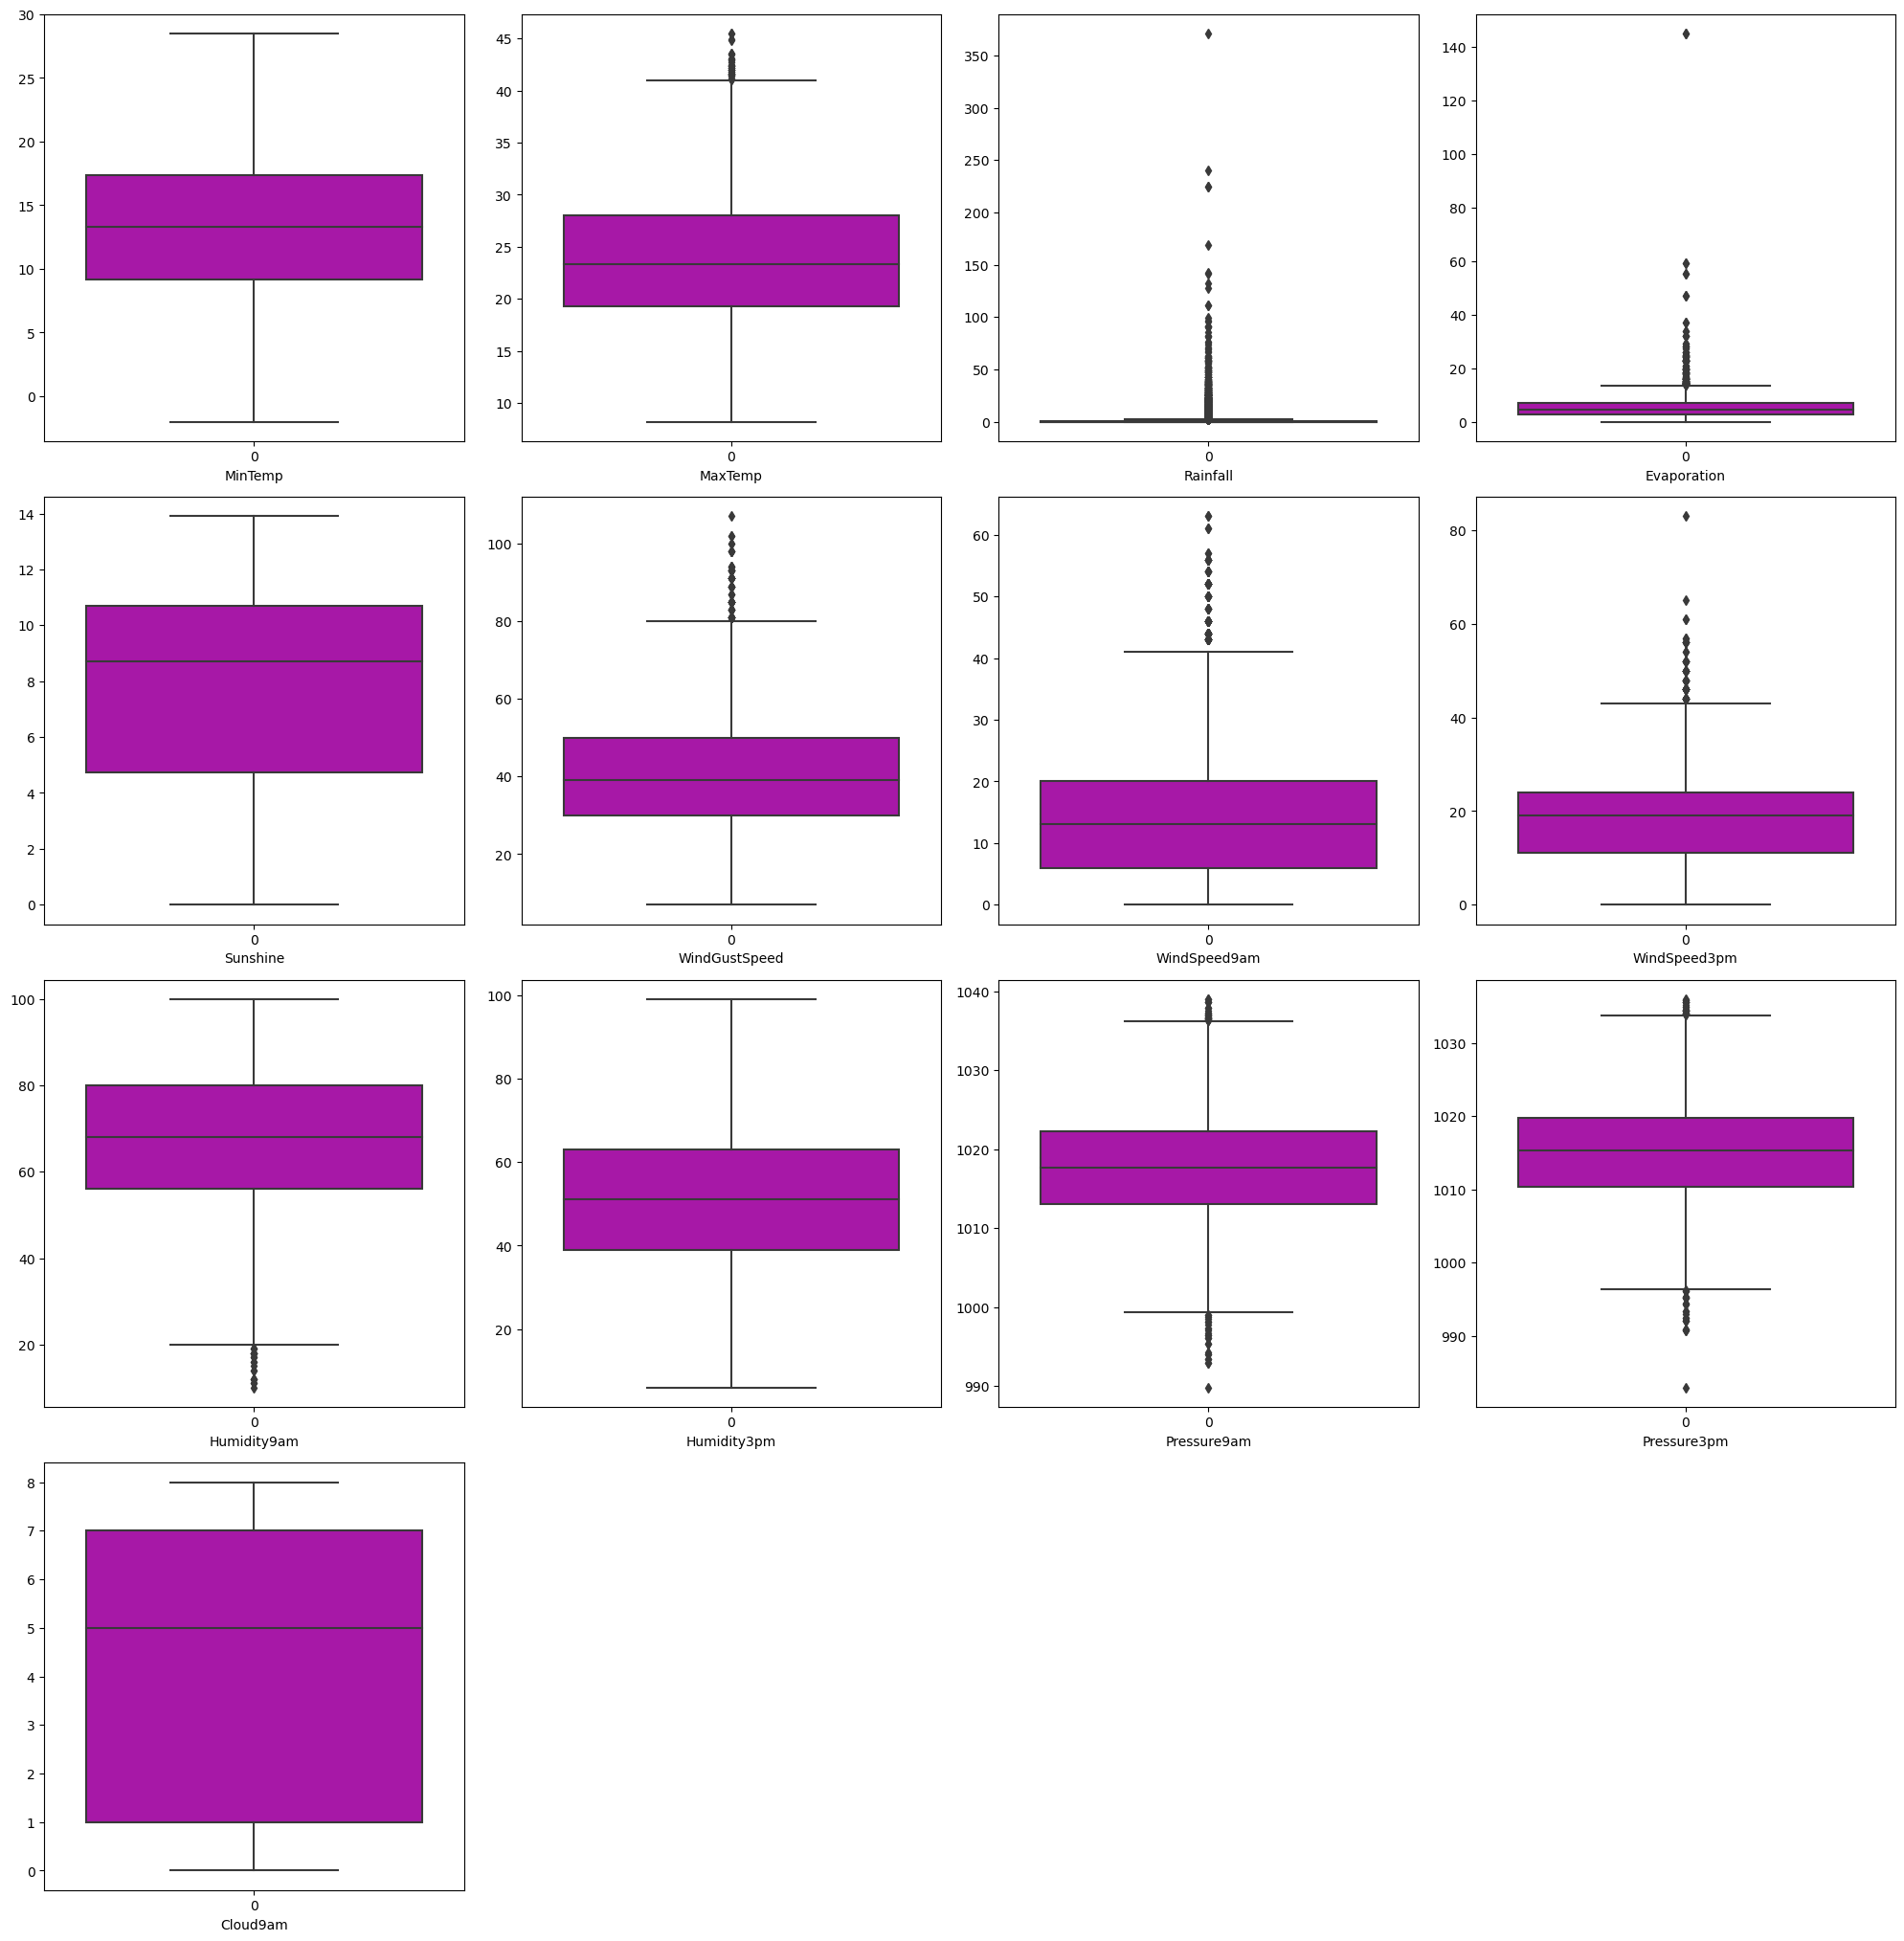

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 25))

p = 1
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns

for i in numeric_columns:
    if p <= 13:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(data=data[i], color="m")
        plt.xlabel(i)
        p += 1

plt.tight_layout()
plt.show() 

In [41]:
import numpy as np
from scipy.stats import zscore
data2=data1[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]
z=np.abs(zscore(data2))
z

MinTemp       MaxTemp  Rainfall   Evaporation      Sunshine  \
0     0.038425  1.570089e-01  0.213986  2.305893e-16  1.257472e-15   
1     1.076989  2.028121e-01  0.272189  2.305893e-16  1.257472e-15   
2     0.054526  3.009450e-01  0.272189  2.305893e-16  1.257472e-15   
3     0.742365  6.771214e-01  0.272189  2.305893e-16  1.257472e-15   
4     0.800625  1.380408e+00  0.175183  2.305893e-16  1.257472e-15   
...        ...           ...       ...           ...           ...   
8420  1.932140  7.523137e-02  0.272189  2.305893e-16  1.257472e-15   
8421  1.783418  2.355231e-01  0.272189  2.305893e-16  1.257472e-15   
8422  1.448794  4.972110e-01  0.272189  2.305893e-16  1.257472e-15   
8423  1.002628  5.135665e-01  0.272189  2.305893e-16  1.257472e-15   
8424  0.317279  2.905320e-15  0.272189  2.305893e-16  1.257472e-15   

      WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          0.277710      0.607461      0.563297     0.189439     1.597406   
1          0.277710      0.972321      0.357200     1.420268     1.433568   
2          0.422897      0.508725      0.769394     1.777981     1.160505   
3          1.174166      0.281166      0.982428     1.360650     1.925081   
4          0.059928      0.676112      0.151104     0.845246     0.996668   
...             ...           ...           ...          ...          ...   
8420       0.666009      0.083694      0.776331     1.002937     1.488181   
8421       1.319354      0.083694      0.982428     0.704843     1.652018   
8422       0.230447      0.478639      0.982428     0.883699     1.488181   
8423       0.883791      0.083694      1.188525     1.002937     1.488181   
8424       0.000000      0.311252      0.158041     0.347130     0.832830   

      Pressure9am  Pressure3pm  Cloud9am      Cloud3pm   Temp9am   Temp3pm  
0        1.584003     1.308665  1.413459  3.862851e-16  0.153712  0.108138  
1        1.121880     1.196072  0.000000  3.862851e-16  0.100217  0.312348  
2        1.599939     1.051309  0.000000  1.088680e+00  0.577390  0.127334  
3        0.006411     0.391836  0.000000  3.862851e-16  0.060269  0.682376  
4        1.090010     1.485596  1.001777  1.520830e+00  0.006773  1.220599  
...           ...          ...       ...           ...       ...       ...  
8420     1.109058     0.814518  0.000000  3.862851e-16  1.366273  0.007221  
8421     0.933770     0.621501  0.000000  3.862851e-16  1.223619  0.345987  
8422     0.535388     0.251553  0.000000  3.862851e-16  0.938310  0.615099  
8423     0.280424     0.203299  0.644950  1.088680e+00  0.474684  0.598279  
8424     0.407906     0.428485  1.413459  1.520830e+00  0.492516  0.259513  

[8425 rows x 16 columns]

In [44]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [43]:
z.iloc[44,15]

3.205294652664649

In [31]:
#removing the data above z score and ceating new data frame
#data1=data[(z<3).all(axis=1)]
data1.shape

(17782, 14)

In [34]:
#print("data loss percentage:-",((data.shape[0])-data1.shape[0])/100)

data loss percentage:- 4.67


In [45]:
data.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12868\3786652358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()# -05 to +0.5


MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

In [47]:
import numpy as np

data1['Evaporation'] = np.cbrt(data['Evaporation'])

In [48]:
data1.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12868\2517516131.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.719054
Evaporation      0.444011
Sunshine        -0.716525
WindGustSpeed    0.757000
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


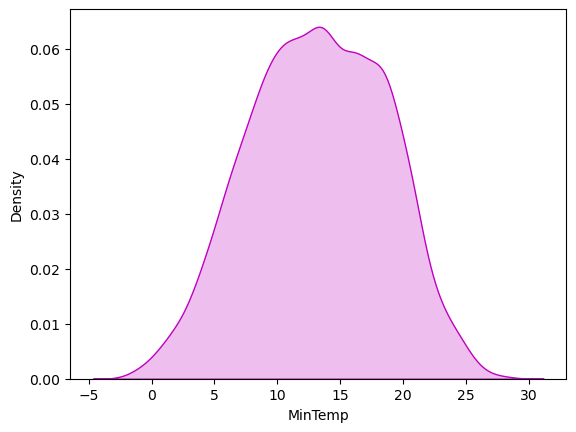

In [49]:
sns.distplot(data["MinTemp"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


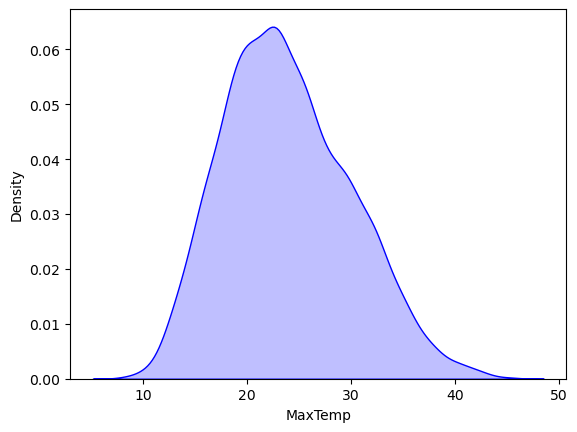

In [50]:
sns.distplot(data["MaxTemp"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


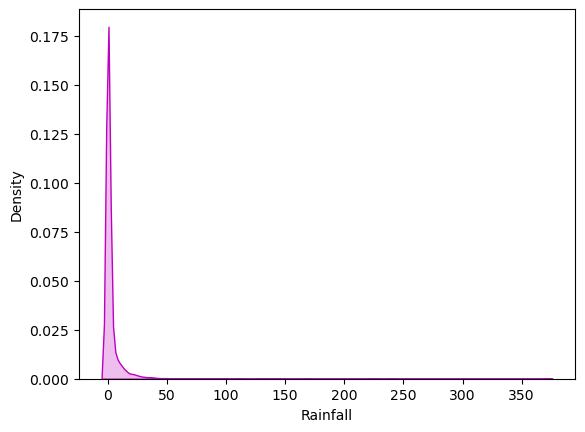

In [51]:
sns.distplot(data["Rainfall"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


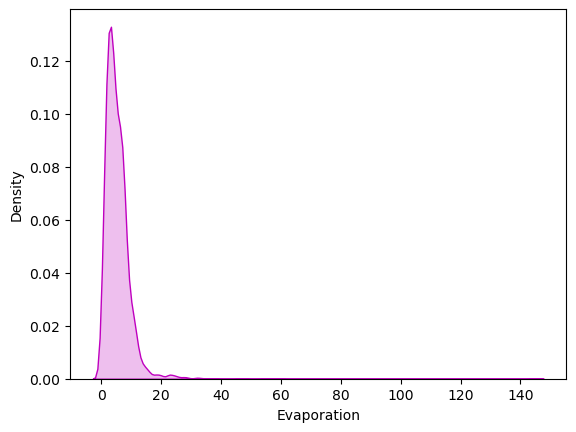

In [52]:
sns.distplot(data["Evaporation"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


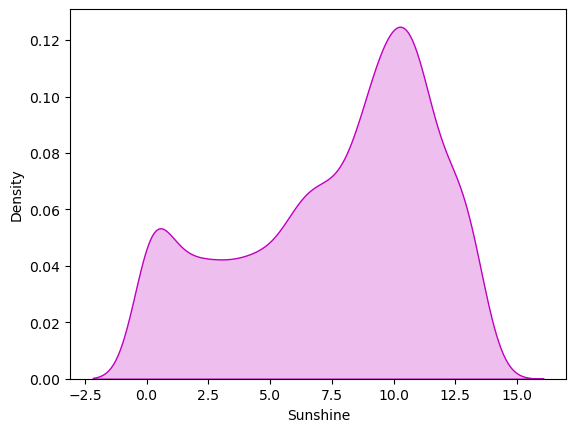

In [53]:
sns.distplot(data["Sunshine"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

binomial

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


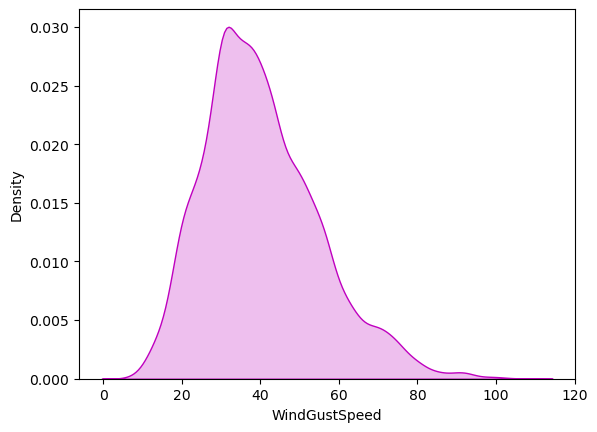

In [54]:
sns.distplot(data["WindGustSpeed"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


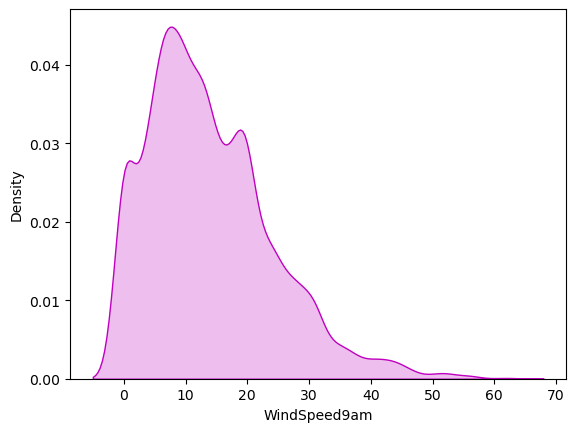

In [55]:
sns.distplot(data["WindSpeed9am"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


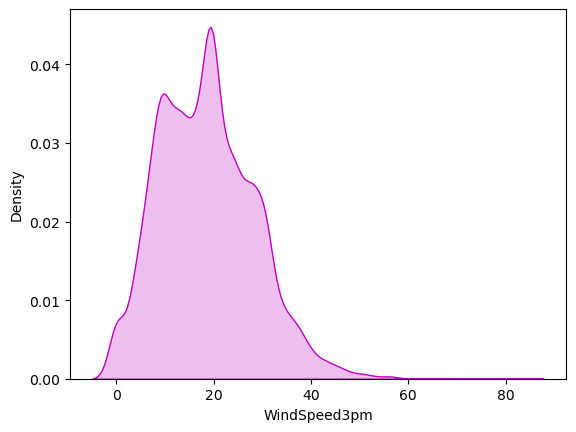

In [56]:
sns.distplot(data["WindSpeed3pm"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


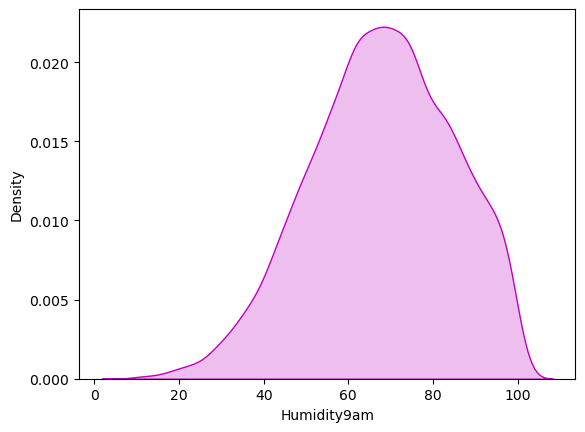

In [57]:
sns.distplot(data["Humidity9am"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

In [58]:
data1.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12868\3614562547.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()# -05 to +0.5


MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.719054
Evaporation      0.444011
Sunshine        -0.716525
WindGustSpeed    0.757000
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
dtype: float64

Encoding Categorical Columns

In [59]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data1

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0.0       1.0     13.4  22.900000  0.843433          NaN  7.632205   
1        1.0       1.0      7.4  25.100000  0.000000          NaN  7.632205   
2        2.0       1.0     12.9  25.700000  0.000000          NaN  7.632205   
3        3.0       1.0      9.2  28.000000  0.000000          NaN  7.632205   
4        4.0       1.0     17.5  32.300000  1.000000          NaN  7.632205   
...      ...       ...      ...        ...       ...          ...       ...   
8420  2999.0       9.0      2.8  23.400000  0.000000          NaN  7.632205   
8421  3000.0       9.0      3.6  25.300000  0.000000          NaN  7.632205   
8422  3001.0       9.0      5.4  26.900000  0.000000          NaN  7.632205   
8423  3002.0       9.0      7.8  27.000000  0.000000          NaN  7.632205   
8424  3003.0       9.0     14.9  23.859976  0.000000          NaN  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0            13.0      44.000000        13.0  ...         71.0         22.0   
1            14.0      44.000000         6.0  ...         44.0         25.0   
2            15.0      46.000000        13.0  ...         38.0         30.0   
3             4.0      24.000000         9.0  ...         45.0         16.0   
4            13.0      41.000000         1.0  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420          0.0      31.000000         9.0  ...         51.0         24.0   
8421          6.0      22.000000         9.0  ...         56.0         21.0   
8422          3.0      37.000000         9.0  ...         53.0         24.0   
8423          9.0      28.000000        10.0  ...         51.0         24.0   
8424          NaN      40.174469         2.0  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
8420        0.0           0.0  
8421        0.0           0.0  
8422        0.0           0.0  
8423        0.0           0.0  
8424        0.0           NaN  

[8425 rows x 23 columns]

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   float64
 1   Location       8425 non-null   float64
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    7434 non-null   float64
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     7596 non-null   float64
 10  WindDir3pm     8117 non-null   float64
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [61]:
data1.describe()

Date     Location      MinTemp      MaxTemp     Rainfall  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8185.000000   
mean   1296.570564     5.793591    13.193305    23.859976     0.554807   
std     854.249434     3.162654     5.379488     6.114516     0.904775   
min       0.000000     0.000000    -2.000000     8.200000     0.000000   
25%     589.000000     3.000000     9.300000    19.300000     0.000000   
50%    1088.000000     6.000000    13.200000    23.300000     0.000000   
75%    2021.000000     8.000000    17.300000    28.000000     1.000000   
max    3003.000000    11.000000    28.500000    45.500000     7.185516   

       Evaporation     Sunshine  WindGustDir  WindGustSpeed   WindDir9am  ...  \
count  4913.000000  8425.000000  7434.000000    8425.000000  7596.000000  ...   
mean      1.652377     7.632205     7.780065      40.174469     7.733149  ...   
std       0.413279     2.825451     4.730222      13.776101     4.598166  ...   
min       0.000000     0.000000     0.000000       7.000000     0.000000  ...   
25%       1.375069     7.632205     3.000000      31.000000     3.000000  ...   
50%       1.663103     7.632205     8.000000      40.174469     8.000000  ...   
75%       1.912931     8.900000    12.000000      48.000000    12.000000  ...   
max       5.253588    13.900000    15.000000     107.000000    15.000000  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     67.822496    51.249790  1017.640233  1015.236075     4.566622   
std      16.774231    18.311894     6.275759     6.217451     2.429205   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1014.000000  1011.400000     3.000000   
50%      68.000000    51.000000  1017.640233  1015.236075     4.566622   
75%      80.000000    63.000000  1021.300000  1018.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  8425.000000  8425.000000  8425.000000  8185.000000   8186.000000  
mean      4.503183    17.762015    22.442934     0.243128      0.243220  
std       2.299419     5.608301     5.945849     0.428998      0.429053  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       3.000000    13.800000    18.100000     0.000000      0.000000  
50%       4.503183    17.762015    22.000000     0.000000      0.000000  
75%       7.000000    21.900000    26.300000     0.000000      0.000000  
max       8.000000    39.400000    44.100000     1.000000      1.000000  

[8 rows x 23 columns]

CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [62]:
corr=data1.corr()
corr

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016931  0.102409  0.010275     0.241247   
Location       0.475037  1.000000  0.116531  0.064268  0.015977     0.214010   
MinTemp        0.016931  0.116531  1.000000  0.717522  0.091065     0.499382   
MaxTemp        0.102409  0.064268  0.717522  1.000000 -0.225263     0.601104   
Rainfall       0.010275  0.015977  0.091065 -0.225263  1.000000    -0.186128   
Evaporation    0.241247  0.214010  0.499382  0.601104 -0.186128     1.000000   
Sunshine       0.065101  0.057817  0.056184  0.378403 -0.273076     0.353088   
WindGustDir    0.002771 -0.021478 -0.164345 -0.247104  0.148125    -0.127354   
WindGustSpeed -0.037361  0.231396  0.230058  0.139998  0.096252     0.229764   
WindDir9am     0.025495 -0.052450 -0.094803 -0.257604  0.188210    -0.098243   
WindDir3pm    -0.009253 -0.028233 -0.146554 -0.179900  0.106314    -0.060870   
WindSpeed9am  -0.083943  0.221378  0.136872  0.013314  0.040064     0.194470   
WindSpeed3pm  -0.046362  0.231801  0.178349  0.088172  0.025068     0.180574   
Humidity9am    0.086328  0.005662 -0.130731 -0.390976  0.418355    -0.432602   
Humidity3pm   -0.038345  0.055790  0.079048 -0.421879  0.401861    -0.315226   
Pressure9am    0.030809 -0.032261 -0.429432 -0.325721 -0.123454    -0.306494   
Pressure3pm    0.013545 -0.020574 -0.422991 -0.403258 -0.047205    -0.326214   
Cloud9am       0.005237  0.038019  0.091604 -0.253968  0.316105    -0.140366   
Cloud3pm      -0.010572  0.017561  0.038414 -0.250132  0.269389    -0.183414   
Temp9am        0.070703  0.118051  0.887119  0.866039 -0.086494     0.585255   
Temp3pm        0.113734  0.060570  0.685520  0.974506 -0.234392     0.583542   
RainToday     -0.006431  0.007156  0.069743 -0.228818  0.880506    -0.208327   
RainTomorrow  -0.005960  0.006746  0.098989 -0.154394  0.355036    -0.112852   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.065101     0.002771      -0.037361    0.025495  ...   
Location       0.057817    -0.021478       0.231396   -0.052450  ...   
MinTemp        0.056184    -0.164345       0.230058   -0.094803  ...   
MaxTemp        0.378403    -0.247104       0.139998   -0.257604  ...   
Rainfall      -0.273076     0.148125       0.096252    0.188210  ...   
Evaporation    0.353088    -0.127354       0.229764   -0.098243  ...   
Sunshine       1.000000    -0.110430      -0.013778   -0.084595  ...   
WindGustDir   -0.110430     1.000000       0.017559    0.424364  ...   
WindGustSpeed -0.013778     0.017559       1.000000   -0.129769  ...   
WindDir9am    -0.084595     0.424364      -0.129769    1.000000  ...   
WindDir3pm    -0.068082     0.555888       0.073919    0.275970  ...   
WindSpeed9am  -0.018069    -0.055207       0.600198   -0.083343  ...   
WindSpeed3pm   0.030145     0.050007       0.634939   -0.037624  ...   
Humidity9am   -0.360831     0.072626      -0.269593    0.109352  ...   
Humidity3pm   -0.440268     0.084295      -0.091860    0.158886  ...   
Pressure9am    0.021887    -0.120665      -0.407139    0.011257  ...   
Pressure3pm   -0.035863    -0.031859      -0.372651    0.100325  ...   
Cloud9am      -0.533391     0.119021       0.023313    0.120514  ...   
Cloud3pm      -0.547304     0.096027       0.078631    0.071062  ...   
Temp9am        0.250640    -0.195648       0.202298   -0.167168  ...   
Temp3pm        0.395324    -0.262300       0.102199   -0.261823  ...   
RainToday     -0.244252     0.145821       0.083658    0.179044  ...   
RainTomorrow  -0.341215     0.058465       0.198939    0.032100  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.086328    -0.038345     0.030809     0.013545  0.005237   
Location          0.005662     0.055790    -0.032261    -0.020574  0.038019   
MinTemp          -0.130731     0.079048    -0.429432    -0.422991  0.091604   
MaxTemp          -0.390976    -0.421879    -0.325721 

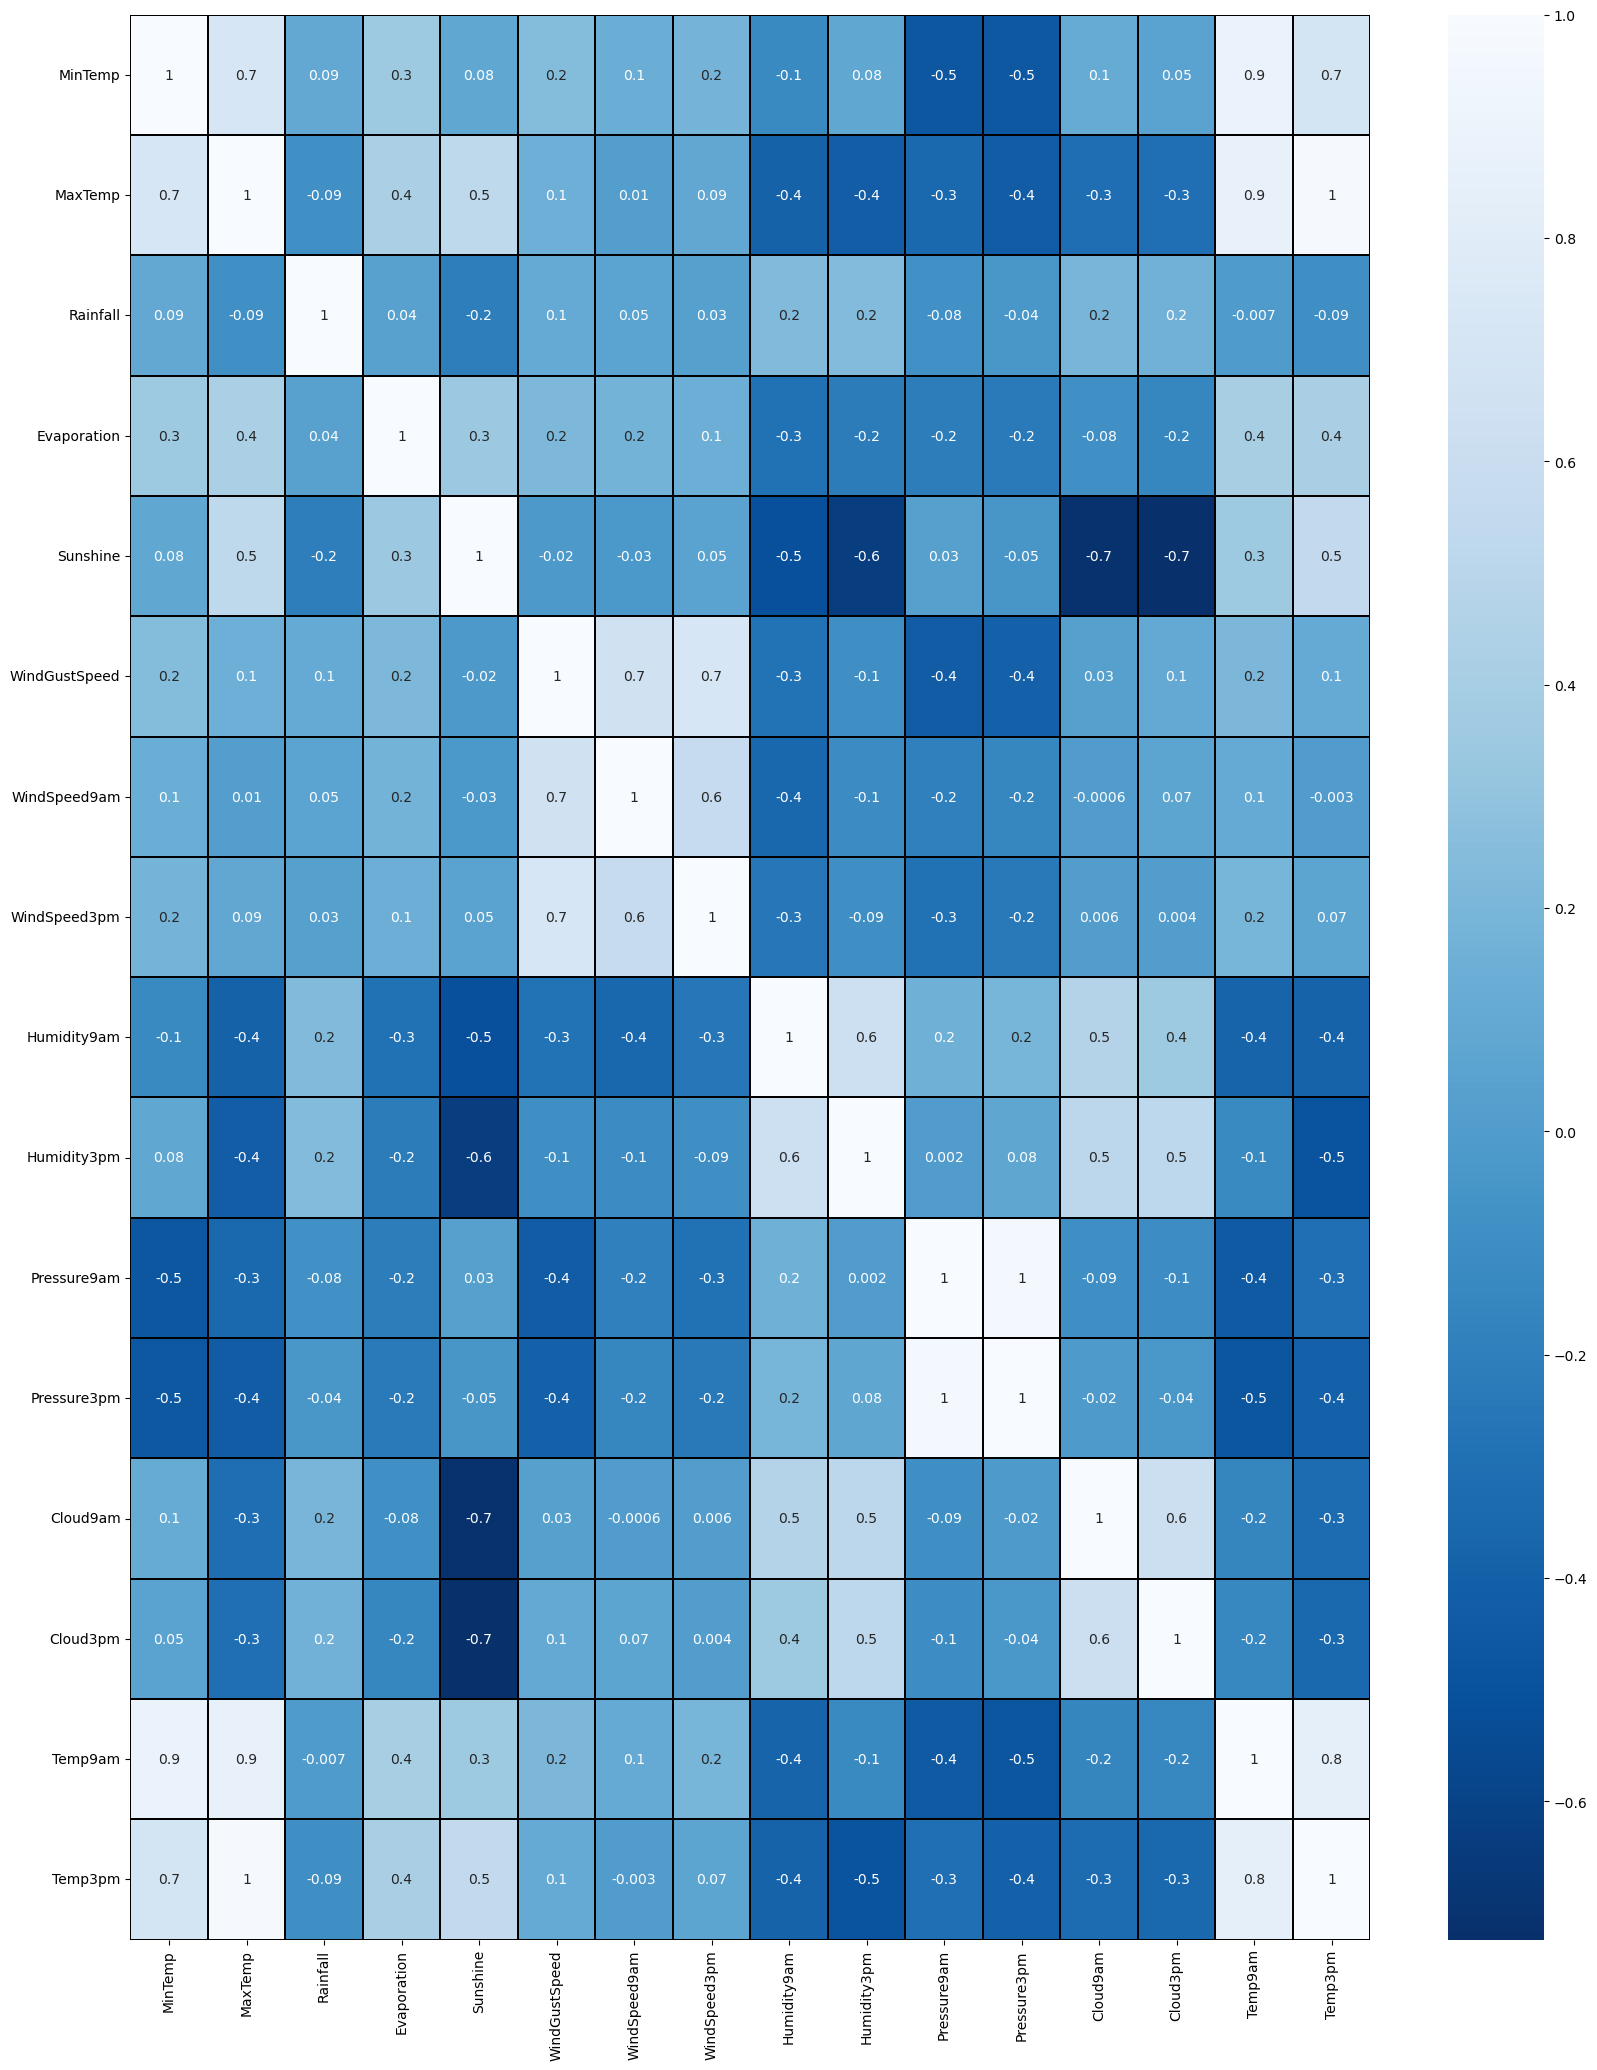

In [63]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. 

In [64]:
corr["Rainfall"].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.880506
Humidity9am      0.418355
Humidity3pm      0.401861
RainTomorrow     0.355036
Cloud9am         0.316105
Cloud3pm         0.269389
WindDir9am       0.188210
WindGustDir      0.148125
WindDir3pm       0.106314
WindGustSpeed    0.096252
MinTemp          0.091065
WindSpeed9am     0.040064
WindSpeed3pm     0.025068
Location         0.015977
Date             0.010275
Pressure3pm     -0.047205
Temp9am         -0.086494
Pressure9am     -0.123454
Evaporation     -0.186128
MaxTemp         -0.225263
Temp3pm         -0.234392
Sunshine        -0.273076
Name: Rainfall, dtype: float64

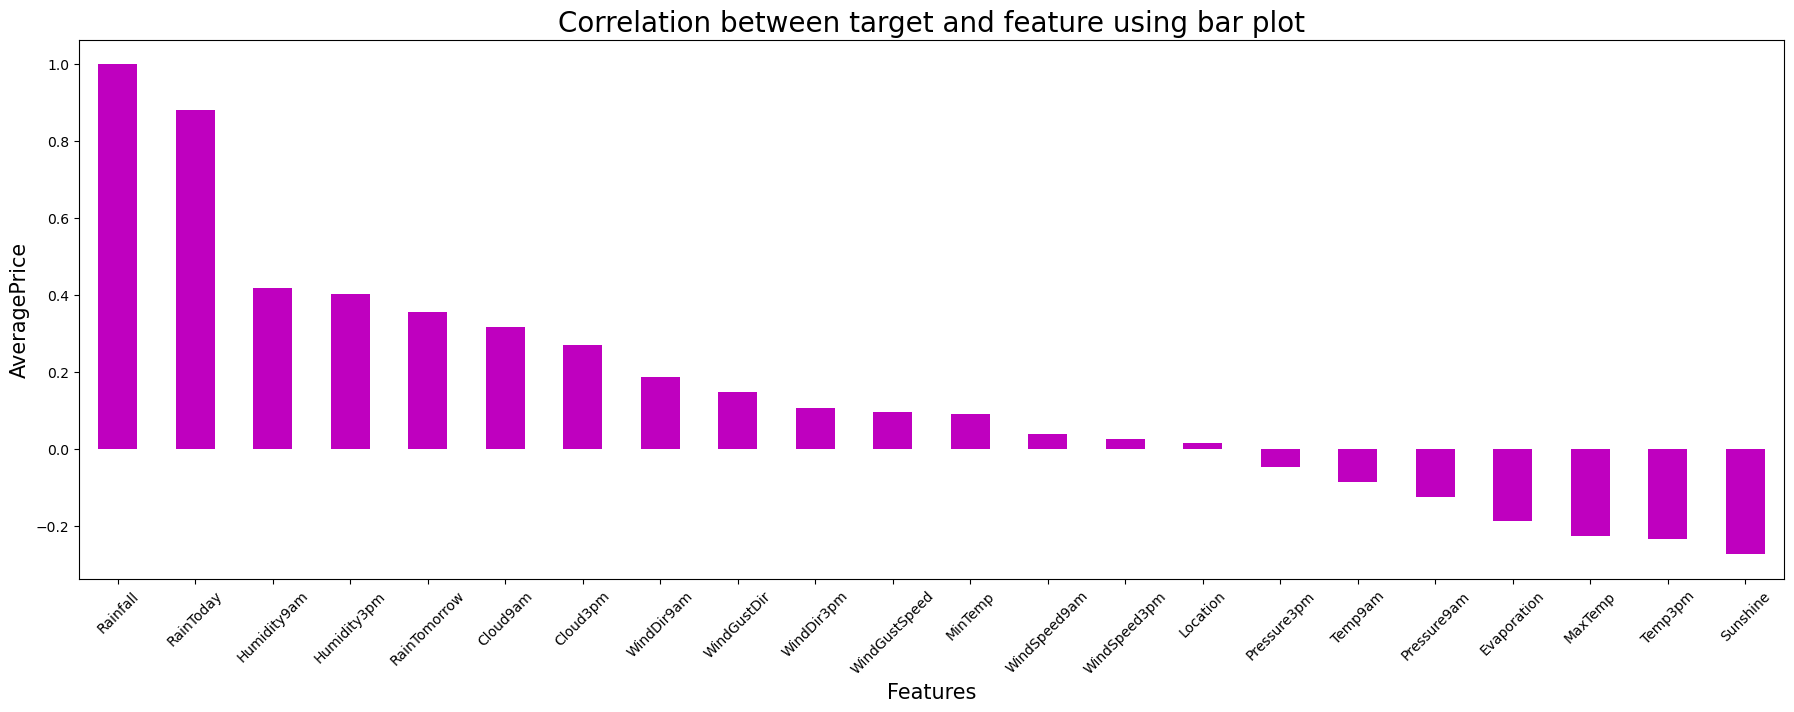

In [65]:
plt.figure(figsize=(22,7), facecolor="white")
data1.corr()["Rainfall"].sort_values(ascending=False).drop(["Date"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("AveragePrice", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

In [66]:
x=data1.drop("Rainfall",axis=1)
y=data1["Rainfall"]

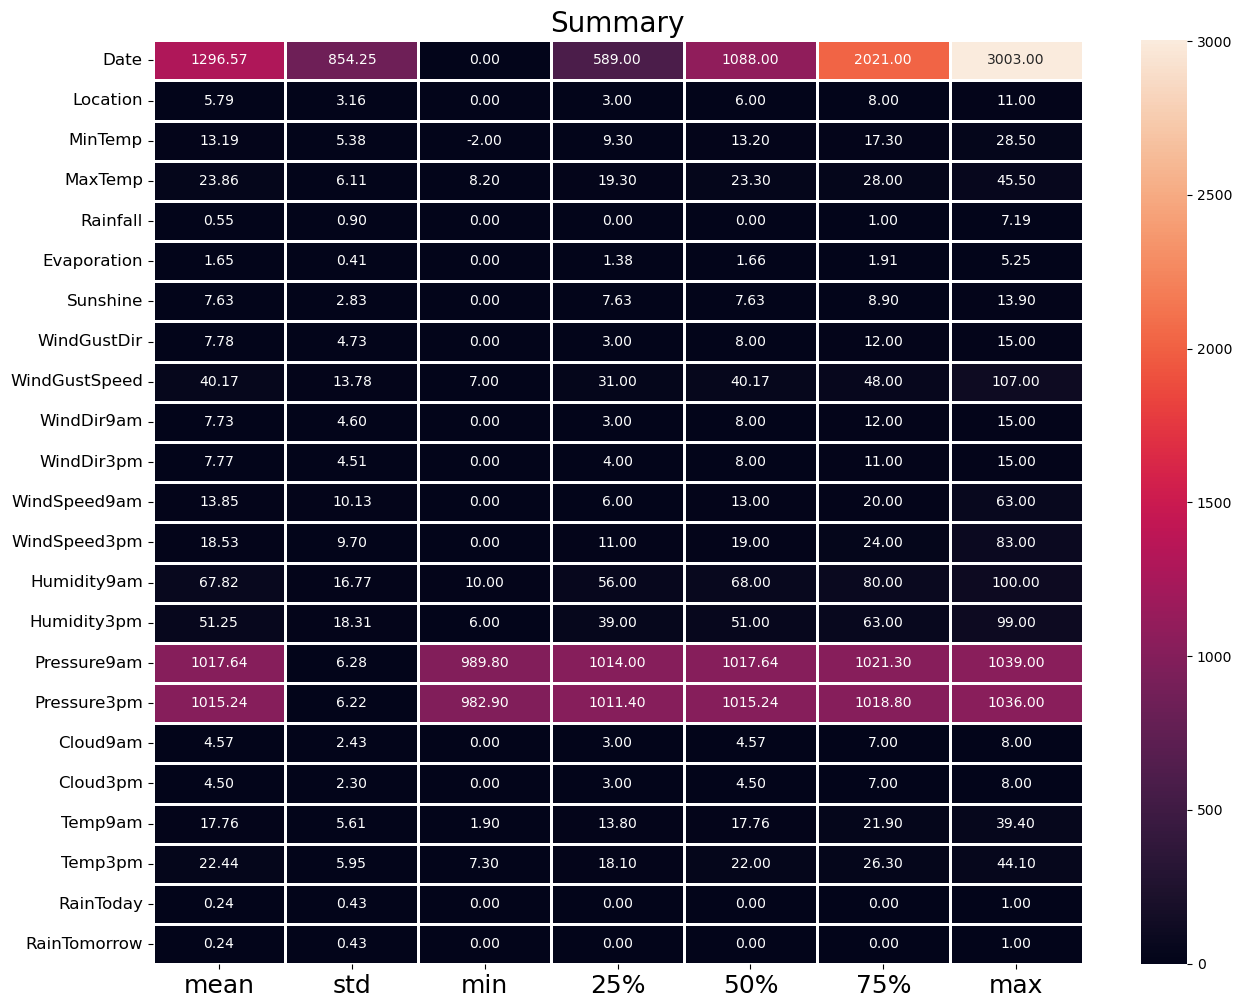

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(data1.describe()[1:].transpose(), linewidths=2, annot=True, fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary", fontsize=20)

plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data into the variable `x`
x = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

# Select only the numeric columns
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Apply StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

print(x_scaled)

[[ 0.0382536  -0.15644877 -0.21091577 ...         nan -0.15320076
  -0.10752019]
 [-1.07218454  0.20208859 -0.26828406 ...         nan -0.09988353
   0.31056368]
 [-0.05428291  0.29987151 -0.26828406 ... -0.91643664  0.57546804
   0.12660678]
 ...
 [-1.44233059  0.49543734 -0.26828406 ...         nan -0.9351868
   0.61158407]
 [-0.99815533  0.5117345  -0.26828406 ... -0.91643664 -0.47310414
   0.59486071]
 [ 0.31586313         nan -0.26828406 ...  1.28021489 -0.49087655
  -0.25803038]]


CHECKING VARIANCE INFLATION(VIF)

In [71]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)


          Feature            VIF
0         MinTemp      59.557854
1         MaxTemp     603.538112
2        Rainfall       1.291108
3     Evaporation       5.545900
4        Sunshine      19.695195
5   WindGustSpeed      30.792864
6    WindSpeed9am       8.861389
7    WindSpeed3pm      13.499339
8     Humidity9am      63.371821
9     Humidity3pm      51.302818
10    Pressure9am  467812.276574
11    Pressure3pm  465344.229697
12       Cloud9am       8.193488
13       Cloud3pm       8.695584
14        Temp9am     198.725031
15        Temp3pm     704.343127


vif is grater than 10 in date, total volume,4225, year it can be dropped. Date has highest VIF Terefore it is dropped first

In [72]:
# dropping date column
x.drop("Pressure9am",axis=1,inplace=True)

In [116]:
# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [74]:



import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)

          Feature         VIF
0         MinTemp   57.984812
1         MaxTemp  603.508981
2        Rainfall    1.279718
3     Evaporation    5.494804
4        Sunshine   19.477036
5   WindGustSpeed   30.689545
6    WindSpeed9am    8.853008
7    WindSpeed3pm   13.428809
8     Humidity9am   62.727974
9     Humidity3pm   49.807552
10    Pressure3pm  144.786015
11       Cloud9am    8.154619
12       Cloud3pm    8.681251
13        Temp9am  191.844597
14        Temp3pm  657.114454


In [76]:
y.value_counts()

0.000000    5299
0.584804     406
0.736806     177
0.843433     116
1.062659      86
            ... 
3.940795       1
5.039684       1
4.481405       1
3.252267       1
3.419952       1
Name: Rainfall, Length: 250, dtype: int64

MODELLING

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['Rainfall']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Remove rows with missing values in the 'Rainfall' column
data1 = data1.dropna(subset=['Rainfall'])

# Select the relevant features and target variable
features = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am']
target = 'Rainfall'
X = data1[features]
y = data1[target]

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predict = lr.predict(X_test)
    acc = r2_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Maximum r2 score is", maxAcc, "on random state", maxRS)


Maximum r2 score is 0.3129692115900151 on random state 153


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_lr))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lr)))


R2 score:  0.3018175786828484
R2_score on training data:  27.917867004990004
Mean Absoloute Error:- 0.5616392555325478
Mean Squared Error:- 0.5615246764905056
Root Mean Squared Error:- 0.7493495022287702


In [88]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.5422651451860874
R2_score on training data:  92.98615933879987
Mean Absoloute Error:- 0.38650515677599223
Mean Squared Error:- 0.36814077298439235
Root Mean Squared Error:- 0.6067460531263408


In [89]:
Knn=knn()
Knn.fit(X_train,y_train)
pred_Knn=Knn.predict(X_test)
pred_train=Knn.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.3698997879712167
R2_score on training data:  56.52595024743472
Mean Absoloute Error:- 0.4587022305547008
Mean Squared Error:- 0.5067684417613533
Root Mean Squared Error:- 0.711876704044565


In [90]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred_GBR=Knn.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.3698997879712167
R2_score on training data:  47.16040477541563
Mean Absoloute Error:- 0.4587022305547008
Mean Squared Error:- 0.5067684417613533
Root Mean Squared Error:- 0.711876704044565


In [91]:
lasso=Lasso()
lasso.fit(X_train,y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  -3.277144933089282e-05
R2_score on training data:  0.0
Mean Absoloute Error:- 0.7152909150268913
Mean Squared Error:- 0.8042927769630946
Root Mean Squared Error:- 0.8968237156560338


In [92]:
rd=Ridge()
rd.fit(X_train,y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.30181965485431395
R2_score on training data:  27.917863527165366
Mean Absoloute Error:- 0.5616279727425101
Mean Squared Error:- 0.5615230066955137
Root Mean Squared Error:- 0.7493483880649332


In [93]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_DTR=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: 0.16186905680388863


In [94]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
pred_SVR=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  0.3805744518363131
R2_score on training data:  38.69341146643761
Mean Absoloute Error:- 0.4127767350780388
Mean Squared Error:- 0.498183168070009
Root Mean Squared Error:- 0.7058209178467361


In [95]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
pred_ETR=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.567050525502576
R2_score on training data:  99.792031876499
Mean Absoloute Error:- 0.3318360290808603
Mean Squared Error:- 0.3482067238892372
Root Mean Squared Error:- 0.5900904370426936


In [96]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.33638381 0.26352482 0.19478825 0.19795549 0.31213804]
0.26095808075496796
difference between r2 score and cross validation score is - 28.13070644311194


In [97]:

score2=cross_val_score(Knn,X,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[0.3345506  0.24799965 0.25982059 0.25724295 0.25483653]
0.2708900656148828
difference between r2 score and cross validation score is - 27.137507957120455


In [98]:
score3=cross_val_score(GBR,X,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[0.44747817 0.34035904 0.32999991 0.31302165 0.45879761]
0.37793127447762487
difference between r2 score and cross validation score is - 16.43338707084625


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 2.279e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+02, tolerance: 2.363e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, toleranc

[-3.14100535 -0.54601654  0.07762155 -0.19109535 -0.56342921]
-0.8727849798631148
difference between r2 score and cross validation score is - 167.36698148017118


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 1.920e-01
  model = cd_fast.enet_coordinate_descent(


In [99]:

score5=cross_val_score(rd,X,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[0.33637625 0.26348845 0.1948235  0.19795921 0.31221597]
0.26097267498985943
difference between r2 score and cross validation score is - 28.129247019622795


In [100]:

score6=cross_val_score(dtr,X,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[-0.05417697  0.09388081  0.30655803 -0.06249119 -0.30537372]
-0.004320607662074693
difference between r2 score and cross validation score is - 54.6585752848162


In [101]:
score7=cross_val_score(svr,X,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[0.4246095  0.28322587 0.32804551 0.23819921 0.37705523]
0.3302270632571476
difference between r2 score and cross validation score is - 21.203808192893973


In [102]:

score8=cross_val_score(etr,X,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[0.40449328 0.44619265 0.60570127 0.45730472 0.41743614]
0.4662256106912695
difference between r2 score and cross validation score is - 7.6039534494817875


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regress

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [120]:
# Get the best parameters
best_params = gscv.best_params_
print(best_params)

{'alpha': 4.2, 'fit_intercept': True, 'positive': False, 'random_state': 4, 'solver': 'sag'}


In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(X_train, y_train)

# Make predictions on the test data
pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2_score: 0.3018176844879077
Mean Absolute Error: 0.5616386909988259
Mean Squared Error: 0.5615245913950494
Root Mean Squared Error: 0.7493494454492172


In [123]:
import joblib
import pickle
import pandas as pd

# Save the model using joblib


# Save the model using pickle
filename = "RAINFALL.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('RAINFALL.pkl', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(X_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(X_test), 'original': y_test})
print(conclusion)

30.18176844879077
      predicted  original
7736   1.120465  2.591292
2511   0.285250  0.584804
6502   0.656631  0.000000
1771   0.836327  2.466212
7784   0.515411  0.736806
...         ...       ...
3613   0.572558  0.000000
1782   1.503099  3.144755
7489   0.874763  1.894536
7791   1.212460  1.442250
3351   1.042723  1.473613

[2456 rows x 2 columns]
